let
y = 0+01+age + 02*age^2 + 03*age^3 + 04*age^4"  this equation creat overfitting problem so, how to reduce overfitting..?
                    |
                   \_/
    try to make 03 and 04 almost close to zero
                      |
                     \_/
    y = 0+01*age + 02*age^2

  ##**Mean Square Error** 
  mse = 1/nsigma(i=1 to n)[Yi-Ypred]^2   where Ypred = h0(xi) = 0+01+x1 + 02*x2^2 + 03*x3^3 
  
  ##**mse function we use during training**

##    L1 Regularization
##**mse = 1/nsigma(i=1 to n)[Yi-Ypred]^2 + lambdasigma(1 to n|0i|)**  if we make lambda bigger then 0 value get smaller vise versa

##    L2 Regularization
##**mse = 1/nsigma(i=1 to n)[Yi-Ypred]^2 + lambda*sigma(1 to n(0i)^2)**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# suppress warnings for clean Notebook
import warnings
warnings.filterwarnings('ignore')

In [34]:
data = pd.read_csv("C:\\Users\\HP\\Downloads\\melb_data.csv")
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [36]:
data.describe()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [37]:
data.shape 

(13580, 21)

In [38]:
used_col = ['Suburb','Rooms','Type', 'Price','Method','SellerG','Distance',	'Bathroom', 'Car', 'Landsize', 'BuildingArea','CouncilArea', 'Regionname',	'Propertycount']
data = data[used_col]
data.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,1.0,1.0,202.0,NaN,Yarra,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,1.0,0.0,156.0,79.0,Yarra,Northern Metropolitan,4019.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,2.0,0.0,134.0,150.0,Yarra,Northern Metropolitan,4019.0
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,2.0,1.0,94.0,NaN,Yarra,Northern Metropolitan,4019.0
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,1.0,2.0,120.0,142.0,Yarra,Northern Metropolitan,4019.0


In [39]:

data.shape

(13580, 14)

In [40]:
data.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Distance            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
CouncilArea      1369
Regionname          0
Propertycount       0
dtype: int64

In [43]:
col_fill_zero = ['Car', 'CouncilArea']
data[col_fill_zero] = data[col_fill_zero].fillna(0)
data.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Distance            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6450
CouncilArea         0
Regionname          0
Propertycount       0
dtype: int64

In [44]:
#data['CouncilArea'] = data['CouncilArea'].fillna(data.CouncilArea.mean())
data['BuildingArea'] = data['BuildingArea'].fillna(data.BuildingArea.mean())

In [45]:
data.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [46]:
data.dropna(inplace=True)
data.isnull().sum()


Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [47]:
# for deal with catagorical data we'll do one hot encoding
data = pd.get_dummies(data, drop_first=True)
data.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,Suburb_Airport West,...,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,1.0,1.0,202.0,151.96765,4019.0,False,False,...,False,True,False,False,True,False,False,False,False,False
1,2,1035000.0,2.5,1.0,0.0,156.0,79.00000,4019.0,False,False,...,False,True,False,False,True,False,False,False,False,False
2,3,1465000.0,2.5,2.0,0.0,134.0,150.00000,4019.0,False,False,...,False,True,False,False,True,False,False,False,False,False
3,3,850000.0,2.5,2.0,1.0,94.0,151.96765,4019.0,False,False,...,False,True,False,False,True,False,False,False,False,False
4,4,1600000.0,2.5,1.0,2.0,120.0,142.00000,4019.0,False,False,...,False,True,False,False,True,False,False,False,False,False


In [52]:
X = data.drop('Price', axis=1)
y = data['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=3)

In [ ]:
from sklearn.linear_model import LinearRegression
rng = LinearRegression().fit(X_train, y_train)

In [ ]:
rng.score(X_test, y_test)

In [ ]:
rng.score(X_train, y_train)

In [ ]:
# L1 & lasso regression
from sklearn import linear_model
lasso_rng = linear_model.lasso(alpha=50, max_iter=100, tol=0.1)
lasso_rng.fit(X_train, y_train)

In [ ]:
lasso_rng.score(X_test, y_test)

In [ ]:
lasso_rng.score(X_train, y_train)

In [ ]:
from sklearn.linear_model import ridge
ridge_rng = linear_model.ridge(alpha=50, max_iter=100, tol=0.1)
ridge_rng.fit(X_train, y_train)

In [ ]:
ridge_rng.score(X_test, y_test)

In [ ]:
ridge_rng.score(X_train, y_train)


### apply on Diabetes data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv("C:\\Users\\HP\\Downloads\\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [55]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [57]:
data.shape

(768, 9)

In [59]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [60]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [63]:
lr.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = lr.predict(X_test)

array([ 0.15701719,  0.21018288,  0.19640342,  0.56217567,  0.2320293 ,
        0.01140417,  0.65070565,  0.32920533,  0.38723371,  0.01739578,
        0.16198083,  0.26124257,  0.16505761,  0.25967221,  0.09515097,
        0.09953986,  0.28303375,  0.27319846,  0.72678252,  0.21298644,
        0.44056173,  0.80386257,  0.51400363,  0.39455371,  1.01560502,
        0.47137402,  0.11128824,  0.00735144, -0.00932106,  0.40330884,
        0.24166511,  0.41041616,  0.49491296,  0.61648834, -0.12000226,
        0.20221494,  0.28149131,  0.72584641,  0.70934494,  0.12592445,
        0.17477984,  0.58271773,  0.12323798,  0.44753867,  0.60414424,
        0.76260795,  0.61660265,  0.71227362,  0.02198358, -0.01915884,
       -0.0218327 ,  0.35515116,  0.34857228,  0.71950683,  0.37920685,
        0.5283665 ,  0.53139979,  0.24319805,  0.1983808 ,  0.00356688,
        0.1939389 ,  0.086142  ,  0.63339034,  0.36369396,  0.33643921,
        0.2766214 ,  0.83635768,  0.75506839,  0.51659804,  0.02

In [68]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2 score", r2_score(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 score 0.28816838050413907
RMSE 0.39078822396838614


In [70]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha = 0.0001)

In [71]:
rr.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [79]:
y_pred1 = rr.predict(X_test)

In [80]:
print("R2 score", r2_score(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 score 0.28816838050413907
RMSE 0.39078822396838614


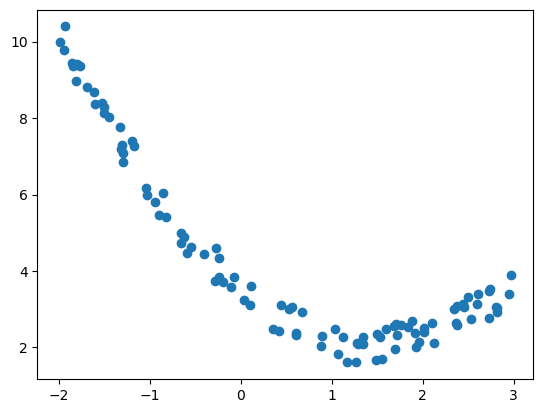

In [81]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1**2-2*x1+3+np.random.rand(m,1)

plt.scatter(x1,x2)
plt.show()

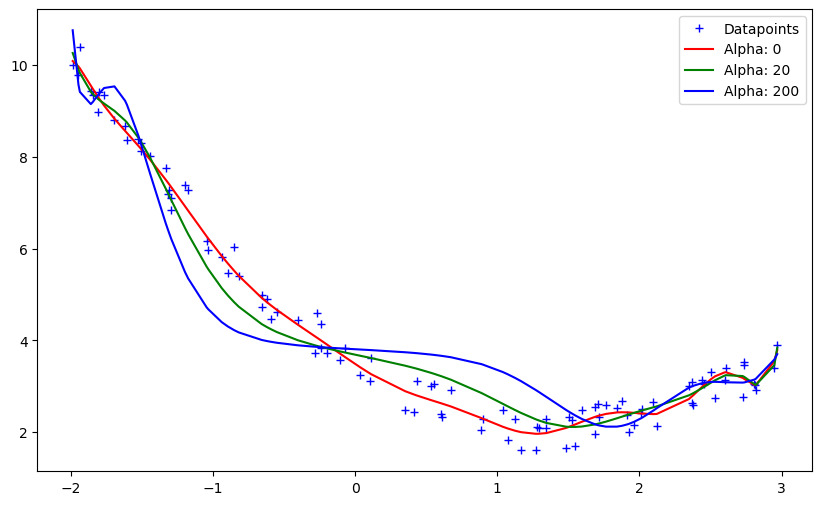

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge',Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label = 'Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    #plot
    plt.plot(sorted(x1[:,0]), preds[np.argsort(x1[:,0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

###              Fake News Prediction
i.   Why is fake news prediction important in today's digital age?

ii.  What are the societal impacts of fake news, and how does this project address them?

iii. How does this project differ from existing solutions?

###         from Methodology
iv.   What is the core methodology or algorithm used for fake news prediction?

v.    How do you collect and preprocess the data used in the project?

vi.   What features or attributes of the data are most important for accurate prediction?

vii.  Are there any specific machine learning models or natural language processing techniques employed? Why were they chosen?

viii. How do you ensure the model's fairness and avoid bias in predictions?

###          from Data and Evaluation
ix.  What sources are used to gather fake news and authentic news samples?

x.   How is the dataset labeled, and what steps are taken to ensure its quality?

xi.  What evaluation metrics are used to measure the performance of the model?

xii. How does the system perform in terms of precision, recall, and accuracy?


###        Challenges 
xiii. What are the main challenges faced in detecting fake news (e.g., lack of labeled data, subtle fake news)?

xiv.  How does the model handle context-based or highly nuanced fake news?

xv.   Are there specific types of fake news (e.g., satire, deepfakes) that are harder to predict?

###  Applications 
xvi.   How can this system be integrated into real-world applications like social media platforms or news aggregators?

xvii.  What are the ethical considerations of deploying a fake news detection system?

xviii. How do you handle false positives (real news flagged as fake) and their consequences?

xix.   Could this project potentially be misused or weaponized, and how do you mitigate those risks?

###   Future Work and Improvements
xx.   What are the next steps for improving the system's performance?

xxi.  How can the system be made more robust against evolving fake news tactics?

xxii. Could the model be adapted for multilingual or multimedia fake news detection?

###   Audience Engagement
xxiii. What role can the public play in combating fake news alongside prediction systems?

xxiv.  How do you envision this project impacting the broader fight against misinformation?

xxv.   What feedback or insights from stakeholders have influenced this project?

### General Questions to Encourage Discussion
xxxvi.   What assumptions underlie the project, and how might they affect outcomes?

xxxvii.  How would you handle criticism of the model's effectiveness or reliability?

xxxviii. What lessons have you learned from working on this project that might be useful for similar initiatives?